In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## import data

In [2]:
column = ['buying','maint','doors','persons','lug_boot','safety','class_values']
data =  pd.read_csv('car.data',names = column)
data

,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# cheking of missing values

In [3]:
print(data.isna().any())

data[data.isna()].head(5)

buying          False
maint           False
doors           False
persons         False
lug_boot        False
safety          False
class_values    False
dtype: bool


,buying,maint,doors,persons,lug_boot,safety,class_values
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## checking of duplicate values

In [4]:
print(data.duplicated().any())

data[data.duplicated()]

False


,buying,maint,doors,persons,lug_boot,safety,class_values


#### as we can say here is so manny duplicate values but it does not effect our model

## data analysics

### now we plot bar chart for some columns

<BarContainer object of 1728 artists>

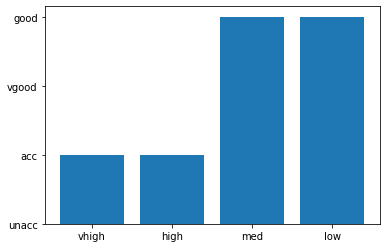

In [5]:
plt.bar(data.buying,data['class_values'])

<BarContainer object of 1728 artists>


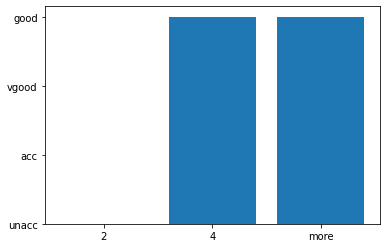

In [6]:
print(plt.bar(data.persons,data['class_values']))

<BarContainer object of 1728 artists>


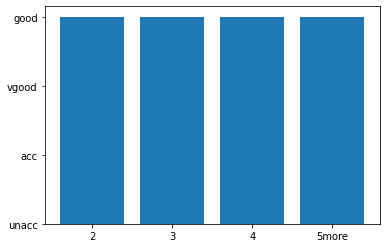

In [7]:
print(plt.bar(data.doors,data['class_values']))


<BarContainer object of 1728 artists>


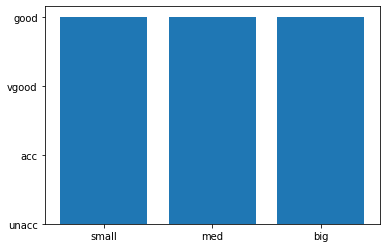

In [8]:
print(plt.bar(data.lug_boot,data['class_values']))

<BarContainer object of 1728 artists>


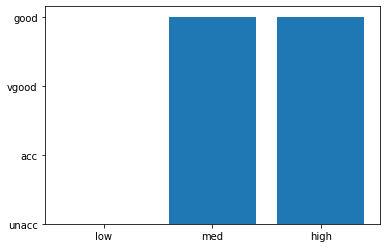

In [9]:
print(plt.bar(data.safety,data['class_values']))

### now we assume that car price is depend on car class_values so we have to predicate car safety first

### For that we use some models
1. regression
2. KNN
3. Decision tree
4. SVM

## devide data in train and test data

#### convert string into int 

## dummies

In [10]:
#data['buying'] = pd.get_dummies(data.buying).iloc[:,1:]
#.
#.
#.
#.
#data['persons'] = pd.get_dummies(data.persons).iloc[:,1:]

## labelencoder

In [11]:
from sklearn import preprocessing
la = preprocessing.LabelEncoder()

In [12]:
data["buying"] = la.fit_transform(data.buying)
data["maint"] = la.fit_transform(data.maint)
data["persons"] = la.fit_transform(data.persons)
data["doors"] = la.fit_transform(data.doors)
data["safety"] = la.fit_transform(data.safety)
data["lug_boot"] = la.fit_transform(data.lug_boot)
data["class_values"] = la.fit_transform(data.class_values)
data

,buying,maint,doors,persons,lug_boot,safety,class_values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


### This labelencoder method is more accurate than any othe so we use this

## making our train and test data

In [13]:
x = data.drop('class_values',axis=1)
y  = data.class_values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2)
x_train

,buying,maint,doors,persons,lug_boot,safety
736,0,2,3,0,0,2
283,3,2,2,1,1,2
246,3,2,1,0,1,1
1123,2,2,1,1,0,2
987,2,0,0,1,0,1
...,...,...,...,...,...,...
633,0,0,3,1,1,1
1097,2,2,0,1,0,0
1028,2,0,2,0,2,0
609,0,0,2,1,0,1


## model 1 linear regression

In [15]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression(fit_intercept=False,positive=True)

In [16]:
ln.fit(x_train,y_train)

LinearRegression(fit_intercept=False, positive=True)

In [17]:
predicated = ln.predict(x_test)

In [18]:
ln.score(x_test,y_test)

-0.22833939632689226

## knn classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)

In [20]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
print(y_test,kn.predict(x_test))

86      2
255     2
98      2
1599    2
599     2
       ..
393     2
416     0
969     2
972     2
417     2
Name: class_values, Length: 346, dtype: int32 [2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 0 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 2 0 1 2
 1 1 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 0 0 0 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 3 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 0 2 0 2 0
 3 2 0 2 2 2 2 2 0 2 2 2 1 2 0 2 2 0 0 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2
 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 2 2 2 2 0 2 2 3 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 2 1 2 2 0 2 0 0 0
 2 2 2 2 2 2 2 2 2 0 1 0 2 0 0 0 2 2 2 2 2 1 2 2 0 0 0 2 2 0 0 1 2 2 2 2 0
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [22]:
kn.score(x_test,y_test)

0.8526011560693642

## Decision tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [24]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
print(y_test,tree.predict(x_test))


86      2
255     2
98      2
1599    2
599     2
       ..
393     2
416     0
969     2
972     2
417     2
Name: class_values, Length: 346, dtype: int32 [2 2 2 2 2 2 2 2 2 2 0 0 3 2 0 0 2 2 2 2 2 0 2 2 2 2 3 0 0 2 2 2 2 2 0 3 2
 2 1 2 2 2 2 0 1 2 2 0 3 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2
 0 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 3 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 2
 2 2 2 0 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 3 0 2 0 0 2 3 2 2 2 2 2 1 2 0 2 0
 3 2 0 2 2 0 2 2 0 2 2 2 0 2 1 2 2 1 0 2 0 0 2 2 0 2 0 0 2 2 0 2 2 2 0 2 2
 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 3 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 3 2 2 0 2 0 2 2 2 0 1 0 0 2 2 0 2 0 2 2 2 2 2 0 0
 2 0 2 2 2 2 2 2 2 0 1 0 2 0 0 1 2 2 2 2 2 1 2 2 0 2 0 2 2 0 0 2 2 0 1 2 0
 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0
 2 2 2 3 2 2 2 2 2 0 2 2 2]


In [26]:
tree.score(x_test,y_test)

0.9797687861271677

## SVM

In [27]:
from sklearn.svm import SVC
svc = SVC(C=2.0,
    kernel='rbf',
    degree=4)

In [28]:
svc.fit(x_train,y_train)

SVC(C=2.0, degree=4)

In [29]:
print(y_test,svc.predict(x_test))

86      2
255     2
98      2
1599    2
599     2
       ..
393     2
416     0
969     2
972     2
417     2
Name: class_values, Length: 346, dtype: int32 [2 2 2 2 2 2 2 2 2 2 0 0 3 2 0 0 2 2 2 2 2 0 2 2 2 2 3 0 0 2 2 2 2 2 0 3 2
 2 1 2 2 2 2 0 1 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2
 0 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 3 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 0 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 3 0 2 0 0 2 3 2 2 2 2 2 1 2 0 2 1
 3 2 0 2 2 0 2 2 0 2 2 2 0 2 0 2 2 1 0 2 0 0 2 2 0 2 2 0 2 2 0 2 2 0 2 2 2
 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 3 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 3 2 2 0 2 0 2 2 2 0 0 0 0 2 2 0 2 0 2 2 2 2 2 1 0
 2 0 2 2 2 2 2 2 2 0 1 1 2 0 0 1 2 2 2 2 2 1 2 2 0 2 0 2 2 0 0 2 2 0 0 2 0
 2 1 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 3 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0
 2 2 2 3 2 2 2 2 2 0 2 2 2]


In [30]:
svc.score(x_test,y_test)

0.9682080924855492

## now we check each model's score using metrix 

In [31]:
predicate_kn = kn.predict(x_test)
predicate_tree = tree.predict(x_test)
predicate_svc = svc.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(predicate_kn,y_test)

In [33]:
print(cn)

[[ 51   6   6   1]
 [  4   3   2   1]
 [ 27   2 234   2]
 [  0   0   0   7]]


In [34]:
cn = confusion_matrix(predicate_tree,y_test)
cn

array([[ 78,   0,   2,   1],
       [  1,  11,   0,   0],
       [  2,   0, 240,   0],
       [  1,   0,   0,  10]], dtype=int64)

In [35]:
cn = confusion_matrix(predicate_svc,y_test)
cn

array([[ 75,   3,   1,   0],
       [  4,   8,   0,   0],
       [  3,   0, 241,   0],
       [  0,   0,   0,  11]], dtype=int64)

## so we can say that svm and decision tree are best model for our data

### There is one another way to find this 

# Gridwssearchcv

In [36]:
from sklearn.model_selection import GridSearchCV

In [67]:
models_param = {'regression':
                {'model':LinearRegression(),
                 'params':{'n_jobs': [1,5,10]}},
                
                'knn':
                {'model':KNeighborsClassifier(),
                 'params':{'n_neighbors':[1,2,5],'n_jobs':[1,4,5],'p':[1,2,5]}},
                
                'decision_tree':
                {'model':DecisionTreeClassifier(),
                 'params':{'max_depth':[1,5,10],'min_samples_split':[2,4]}},
                
                'svm':
                {'model':SVC(),
                 'params':{'C':[1,3,5],'kernel':['rbf','linea'],'degree':[1,4,8]}}}



In [74]:
result = []

for model_name, x in models_param.items():
    clf = GridSearchCV(x['model'],x['params'],cv=4,return_train_score=False)
    clf.fit(x_train,y_train)
   
    result.append({'model':model_name,
                   'best_score':clf.best_score_,
                   'best_param':clf.best_params_ })

C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'linea' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\KD\AppData\Roaming\Python\Py

C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'linea' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\KD\AppData\Roaming\Python\Py

C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\KD\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'linea' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\KD\AppData\Roaming\Python\Py

In [75]:
best_model = pd.DataFrame(result)
best_model

,model,best_score,best_param
0,regression,0.080261,{'n_jobs': 1}
1,knn,0.910273,"{'n_jobs': 1, 'n_neighbors': 5, 'p': 1}"
2,decision_tree,0.971050,"{'max_depth': 10, 'min_samples_split': 2}"
3,svm,0.970328,"{'C': 5, 'degree': 1, 'kernel': 'rbf'}"


## Fom this algoithm we acan say that decision tree is best model or ou datasets

## and we also get specific parameters for that